# FUNCIÓN DE PRODUCCIÓN: COBB-DOUGLAS

Librerías:

In [4]:
import math #operaciones matemáticas
import numpy as np #gestión numérica
import pandas as pd #estructuras de datos
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos
from sklearn.linear_model import LinearRegression #regresión lineal
lr = LinearRegression()

Carga de datos:

In [5]:
datos = "EAS_2018.csv" #archivo con los datos
db = pd.read_csv(datos, sep=';') #we're in
db.head() #vista previa de los datos

,idnoremp,Seccion18,Division,periodo,intio,pottcag,gppgpa,ocgtot,CONINTER,OTROSG,...,gppdocen,gppgpaed1,gppmoni,gppgpned1,gppgpned2,gppgpned3,gpptpoted1,gpptpoted2,gpptpoted3,opcomex
0,10001,I1,55,2018,2661282.0,0.0,30600.0,1522029.0,1337412.0,89191.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,10002,I1,55,2018,4355860.0,0.0,19692.0,2410700.0,2355473.0,7845.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,10003,I1,55,2018,14967912.0,115.0,37122.0,10343391.0,9759456.0,75258.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,10004,I1,55,2018,10666938.0,0.0,21944.0,5924967.0,5813284.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,10005,I2,56,2018,24247713.0,138.0,42248.0,21505783.0,20862660.0,319610.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [6]:
db.shape

(6321, 161)

In [7]:
db.isna().any()
#db.isna().sum()

idnoremp      False
Seccion18     False
Division      False
periodo       False
intio          True
              ...  
gppgpned3      True
gpptpoted1     True
gpptpoted2     True
gpptpoted3     True
opcomex       False
Length: 161, dtype: bool

In [8]:
db_clean = db.replace({np.nan: 0})
db_clean.head()

,idnoremp,Seccion18,Division,periodo,intio,pottcag,gppgpa,ocgtot,CONINTER,OTROSG,...,gppdocen,gppgpaed1,gppmoni,gppgpned1,gppgpned2,gppgpned3,gpptpoted1,gpptpoted2,gpptpoted3,opcomex
0,10001,I1,55,2018,2661282.0,0.0,30600.0,1522029.0,1337412.0,89191.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,10002,I1,55,2018,4355860.0,0.0,19692.0,2410700.0,2355473.0,7845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,10003,I1,55,2018,14967912.0,115.0,37122.0,10343391.0,9759456.0,75258.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,10004,I1,55,2018,10666938.0,0.0,21944.0,5924967.0,5813284.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,10005,I2,56,2018,24247713.0,138.0,42248.0,21505783.0,20862660.0,319610.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [9]:
db_clean.isna().sum().sum()

0

In [22]:
#realizo una copia de los datos para no alterar la db original
db_reg = db_clean[['PROBRU', 'TOTG', 'insertot', 'VALAGRE', 'gppgpa', 'ocgco', 'ocgpp', 'ocgnr']]
db_reg.head()

,PROBRU,TOTG,insertot,VALAGRE,gppgpa,ocgco,ocgpp,ocgnr
0,2661282.0,1095630.0,2518262.0,1323870,30600.0,60127.0,2819.0,188284.0
1,4355860.0,1767399.0,2185760.0,2000387,19692.0,23000.0,58000.0,177000.0
2,14967912.0,2869476.0,6914281.0,5208456,37122.0,56159.0,30711.0,250014.0
3,10666938.0,844514.0,8309250.0,4853654,21944.0,23127.0,54097.0,543956.0
4,24247713.0,2698819.0,6779595.0,3385053,42248.0,167731.0,0.0,3205218.0


In [16]:
db_reg.describe()

,PROBRU,TOTG,insertot,VALAGRE,gppgpa,ocgco,ocgpp,ocgnr
count,6.321000e+03,6.321000e+03,6.321000e+03,6.321000e+03,6.321000e+03,6.321000e+03,6.321000e+03,6.321000e+03
mean,2.798010e+07,9.594720e+06,2.684217e+07,1.505785e+07,5.396009e+04,1.604778e+05,2.958786e+05,4.835703e+05
std,1.293255e+08,2.598083e+07,1.246210e+08,6.768556e+07,1.810976e+05,6.134999e+05,3.218897e+06,3.521788e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,-8.053371e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.218508e+06,9.907840e+05,2.985087e+06,1.515383e+06,0.000000e+00,1.184500e+04,0.000000e+00,9.245000e+03
50%,7.068390e+06,2.376037e+06,6.659277e+06,3.653099e+06,1.328100e+04,3.336600e+04,2.552000e+03,5.344600e+04
75%,1.919992e+07,6.897886e+06,1.807061e+07,1.020370e+07,3.815000e+04,9.336600e+04,3.910100e+04,2.056390e+05
max,4.895684e+09,3.688571e+08,4.697085e+09,2.541625e+09,3.789435e+06,1.611161e+07,1.157845e+08,1.936282e+08


In [17]:
#db_clean['PROBRU']
print(db_reg.corr()['PROBRU'])

PROBRU      1.000000
TOTG        0.630887
insertot    0.998760
VALAGRE     0.969614
gppgpa      0.517548
ocgco       0.592253
ocgpp       0.734447
ocgnr       0.625854
Name: PROBRU, dtype: float64


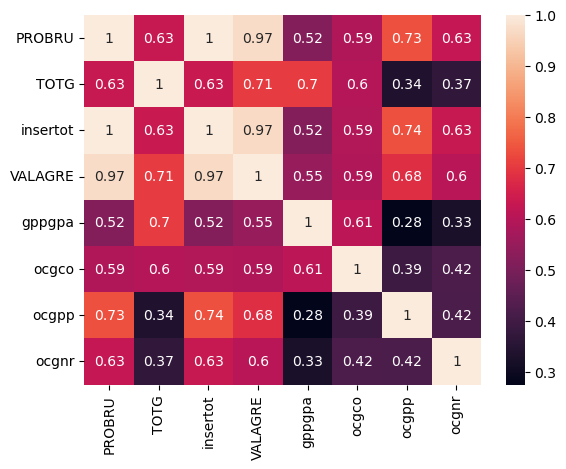

In [18]:
sns.heatmap(db_reg.corr(), annot = True)
#sns.pairplot(data = db_reg, height = 1.5)
plt.show()

In [20]:
db_reg.columns

Index(['PROBRU', 'TOTG', 'insertot', 'VALAGRE', 'gppgpa', 'ocgco', 'ocgpp',
       'ocgnr'],
      dtype='object')

In [23]:
def ln(x): #creación de valores ln para cada columna
    return math.log(x)

db_reg['PROBRU_ln'] = db_reg['PROBRU'].apply(ln)
db_reg['TOTG_ln'] = db_reg['TOTG'].apply(ln)
db_reg['insertot_ln'] = db_reg['insertot'].apply(ln)
db_reg['VALAGRE_ln'] = db_reg['VALAGRE'].apply(ln)
db_reg['gppgpa_ln'] = db_reg['gppgpa'].apply(ln)
db_reg['ocgco_ln'] = db_reg['ocgco'].apply(ln)
db_reg['ocgpp_ln'] = db_reg['ocgpp'].apply(ln)
db_reg['ocgnr_ln'] = db_reg['ocgnr'].apply(ln)

ValueError: math domain error